In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%config InlineBackend.figure_format='retina'

matplotlib.rcParams['font.family'] = "Arial"

In [2]:
import pandas as pd
from tqdm.auto import tqdm

In [205]:
counts_df = pd.read_csv('counts_df.csv')
pairs_df = pd.read_csv('pairs_df.csv')

In [206]:
subset = pd.read_csv('subset.csv')

## Is there in general an increase or decrease of binary oppositions in newspaper?

In [207]:
total = counts_df.groupby('year').sum()
total['rel'] = total['article_count'] / total['total_pairs']

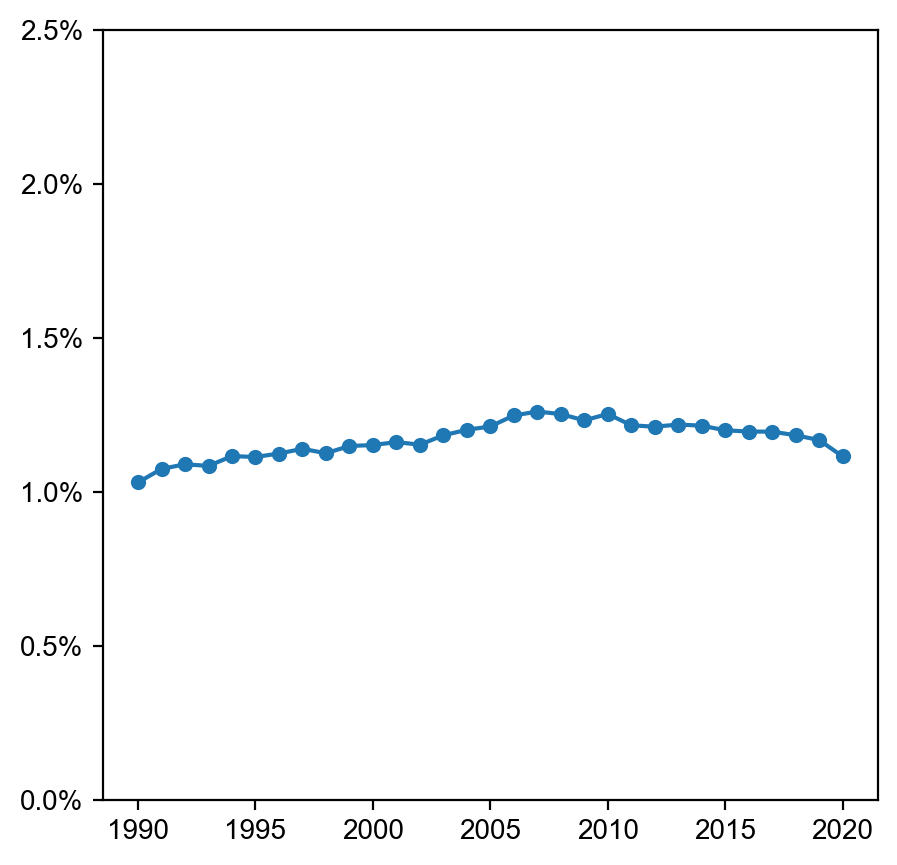

In [208]:
fig, ax  = plt.subplots(figsize=(5, 5))
ax.plot(total.index, total.rel * 100)
ax.scatter(total.index, total.rel * 100, s=20)
ax.set_ylim(0, 2.5)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

# small increase until 2010, then decrease

# what are the most popular antonym pairs?

In [209]:
pairs_df[['w1', 'w2']].value_counts().head(30)

w1          w2        
vrouw       man           22182
jaar        maand         14174
groot       klein         14073
jaar        week          10974
euro        procent       10752
kind        ouder         10665
nieuw       oud            9526
twee        één            8559
eigen       ander          7822
euro        dollar         7695
hoog        laag           7186
keer        één            6751
dag         week           6517
procent     totaal         6349
jong        oud            6226
rechts      links          6101
economisch  sociaal        5904
zwart       wit            5793
vraag       antwoord       5724
europees    nederlands     5677
vader       moeder         5639
ander       één            5581
jaar        kwartaal       5526
europees    amerikaans     5365
werkgever   werknemer      5171
jaar        kort           4703
amerikaans  nederlands     4406
ander       oud            4222
goed        slecht         4199
duits       nederlands     4150
dtype: int64

### what are the articles with the highest frequency of antonym pairs?

## • which antonym pairs increase over time?

In [211]:
pairs_df['combined'] = pairs_df['w1'] + '_' + pairs_df['w2']

In [212]:
grouped_by_year = counts_df.groupby('year').sum().reset_index()
all_years = grouped_by_year.year.values

In [213]:
from collections import Counter

all_arrays = []
all_pairs = []
for pair, pair_df in tqdm(pairs_df.groupby('combined')):
    if len(pair_df) < 100:
        continue
    year_count = Counter(pair_df.year.value_counts().to_dict())
    array = [year_count[year] for year in all_years] 
    all_arrays.append(array)
    all_pairs.append(pair)

  0%|          | 0/128294 [00:00<?, ?it/s]

In [214]:
import numpy as np

def get_trends(X,Y, order=1):
    result = np.polyfit(X, list(Y), order)
    slope = result[-2]
    return float(slope)

rows = []
for i, col in enumerate(all_arrays):
    y = np.array(col) / grouped_by_year['total_pairs']
    slope = get_trends(grouped_by_year.index, y.values)
    rows.append([all_pairs[i], slope, y.values])

In [215]:
top_10_decrease =pd.DataFrame(rows, columns=['col', 'slope',  'y']).sort_values('slope', ascending=True).head(10)
top_10_decrease

,col,slope,y
424,dollar_gulden,-1.583379e-06,"[2.2230542425235176e-05, 3.2658117965336045e-0..."
2087,werkgever_werknemer,-1.375330e-06,"[5.007722188421397e-05, 5.0146013391935344e-05..."
494,economisch_sociaal,-1.058592e-06,"[5.9905461693265314e-05, 6.510553839541185e-05..."
1270,monetair_economisch,-1.028167e-06,"[3.9312959236205365e-05, 3.2026025359555345e-0..."
72,amerikaans_japans,-7.778234e-07,"[2.5272616651846307e-05, 2.3176728878625576e-0..."
459,duits_nederlands,-5.660642e-07,"[3.7440913558290825e-05, 3.792555634684185e-05..."
2196,zwart_blank,-5.580682e-07,"[3.463284504141901e-05, 3.2658117965336045e-05..."
1225,minister_president,-5.529016e-07,"[3.9312959236205365e-05, 4.2771599657827206e-0..."
67,amerikaans_iraaks,-5.019284e-07,"[3.650489071933355e-05, 5.162089613875697e-05,..."
1316,nederlands_buitenlands,-4.992823e-07,"[3.393082791220106e-05, 3.392230317689744e-05,..."


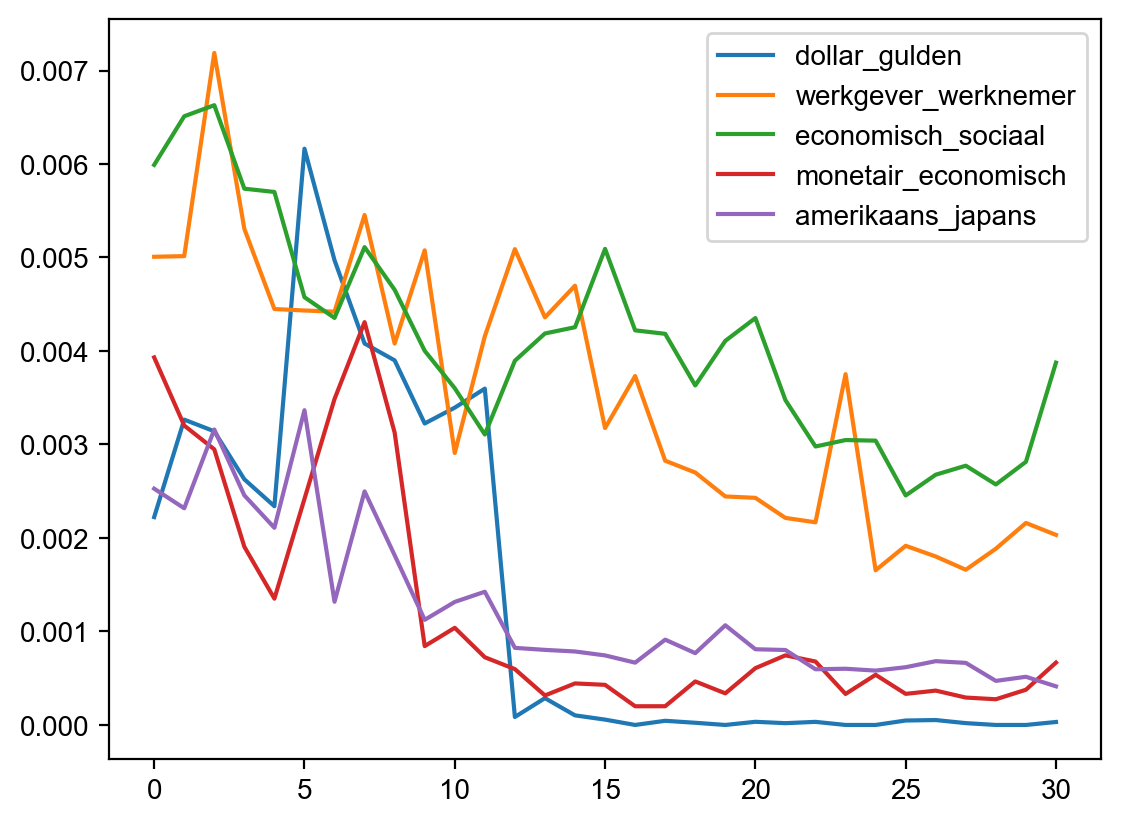

In [216]:
for label in top_10_decrease.head(5).itertuples():
    plt.plot(grouped_by_year.index, label.y * 100, label=label.col)
plt.legend()

### which antonym pairs decrease over time?

In [292]:
top_10_increase =pd.DataFrame(rows, columns=['col', 'slope',  'y']).sort_values('slope', ascending=False).head(50)
top_10_increase.head(20)

,col,slope,y
534,euro_dollar,4.024803e-06,"[0.0, 0.0, 0.0, 0.0, 0.0, 7.111894999982221e-0..."
2017,vrouw_man,3.551975e-06,"[8.447606121589366e-05, 0.00010471667502433556..."
538,euro_procent,3.238783e-06,"[0.0, 2.1069753526023254e-07, 3.85402569363309..."
961,kind_ouder,1.799056e-06,"[3.416483362194038e-05, 3.750416127632139e-05,..."
946,keer_één,9.580269e-07,"[3.229278794402584e-05, 3.3711605641637206e-05..."
1564,rechts_links,8.969320e-07,"[2.5272616651846307e-05, 2.275533380810511e-05..."
369,dag_week,8.087093e-07,"[4.071699349464127e-05, 3.918974155840325e-05,..."
1898,vader_moeder,7.971150e-07,"[1.8720456779145412e-05, 2.4019519019666507e-0..."
882,jong_oud,7.755773e-07,"[2.4570599522628353e-05, 2.8865562330651857e-0..."
869,jaar_week,7.449343e-07,"[6.528759301726962e-05, 6.0259495084426506e-05..."


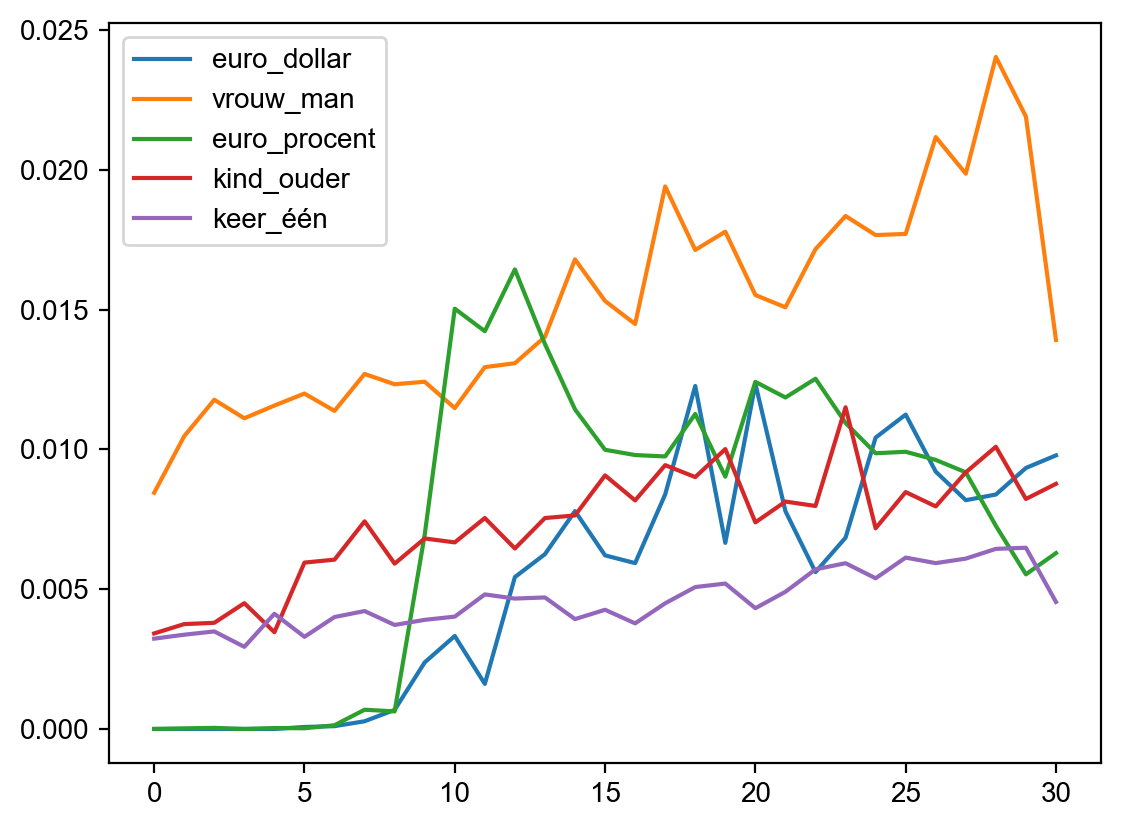

In [293]:
for label in top_10_increase.head(5).itertuples():
    plt.plot(grouped_by_year.index, label.y * 100, label=label.col)
plt.legend()

In [294]:
sample = pd.read_csv('/Users/joris/binary/nrc_sample.csv')
sample['lengte'] = sample.text.apply(lambda x: len(x.split()))


In [295]:
from statsmodels.tsa.stattools import grangercausalitytests


In [296]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=3):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

euro_dollar _c1>w_c2>w
vrouw_man _c1>w_c2>w_w>c2_w>c1
euro_procent _c2>w
kind_ouder _c1>w_c2>w
keer_één _c1>w_w>c1
rechts_links _c2>w
dag_week _c1>w_c2>w_w>c2
vader_moeder 
jong_oud _c1>w_c2>w
jaar_week _c2>w_w>c2
amerikaans_chinees _w>c2_w>c1
zwart_wit 
ministerie_volksgezondheid _w>c2
keer_vorig _c1>w
jaar_maand _w>c2_w>c1
zoon_vader 
oud_kind 
amerikaans_russisch _c2>w_w>c2
turks_syrisch _c2>w_w>c1
russisch_oekraïens _c2>w
man_kind _c1>w
euro_rente _c2>w_w>c1
kind_vader _c1>w
overheid_burger 
broer_zus _c1>w_w>c2
jong_ouder _c1>w_c2>w_w>c2_w>c1
jong_leeftijd _c1>w
politie_gemeente _c1>w_c2>w_w>c2_w>c1
uur_week _c2>w_w>c2
ander_ouder 
amerikaans_iraans _c1>w
boek_film _w>c1
jaar_kwartaal _w>c1
moeder_dochter _c1>w_c2>w
russisch_syrisch _c1>w_c2>w
nederlands_turks _c1>w_c2>w_w>c1
zoon_moeder 
goed_slecht _c1>w_w>c1
slachtoffer_nabestaande _c1>w_w>c2_w>c1
meisje_jongen 
jaar_zomer _c1>w_w>c1
arm_rijk _w>c2_w>c1
kind_volwassen 
patiënt_arts _c1>w_c2>w_w>c1
auto_zelfrijden _c2>w_w>c2
fot

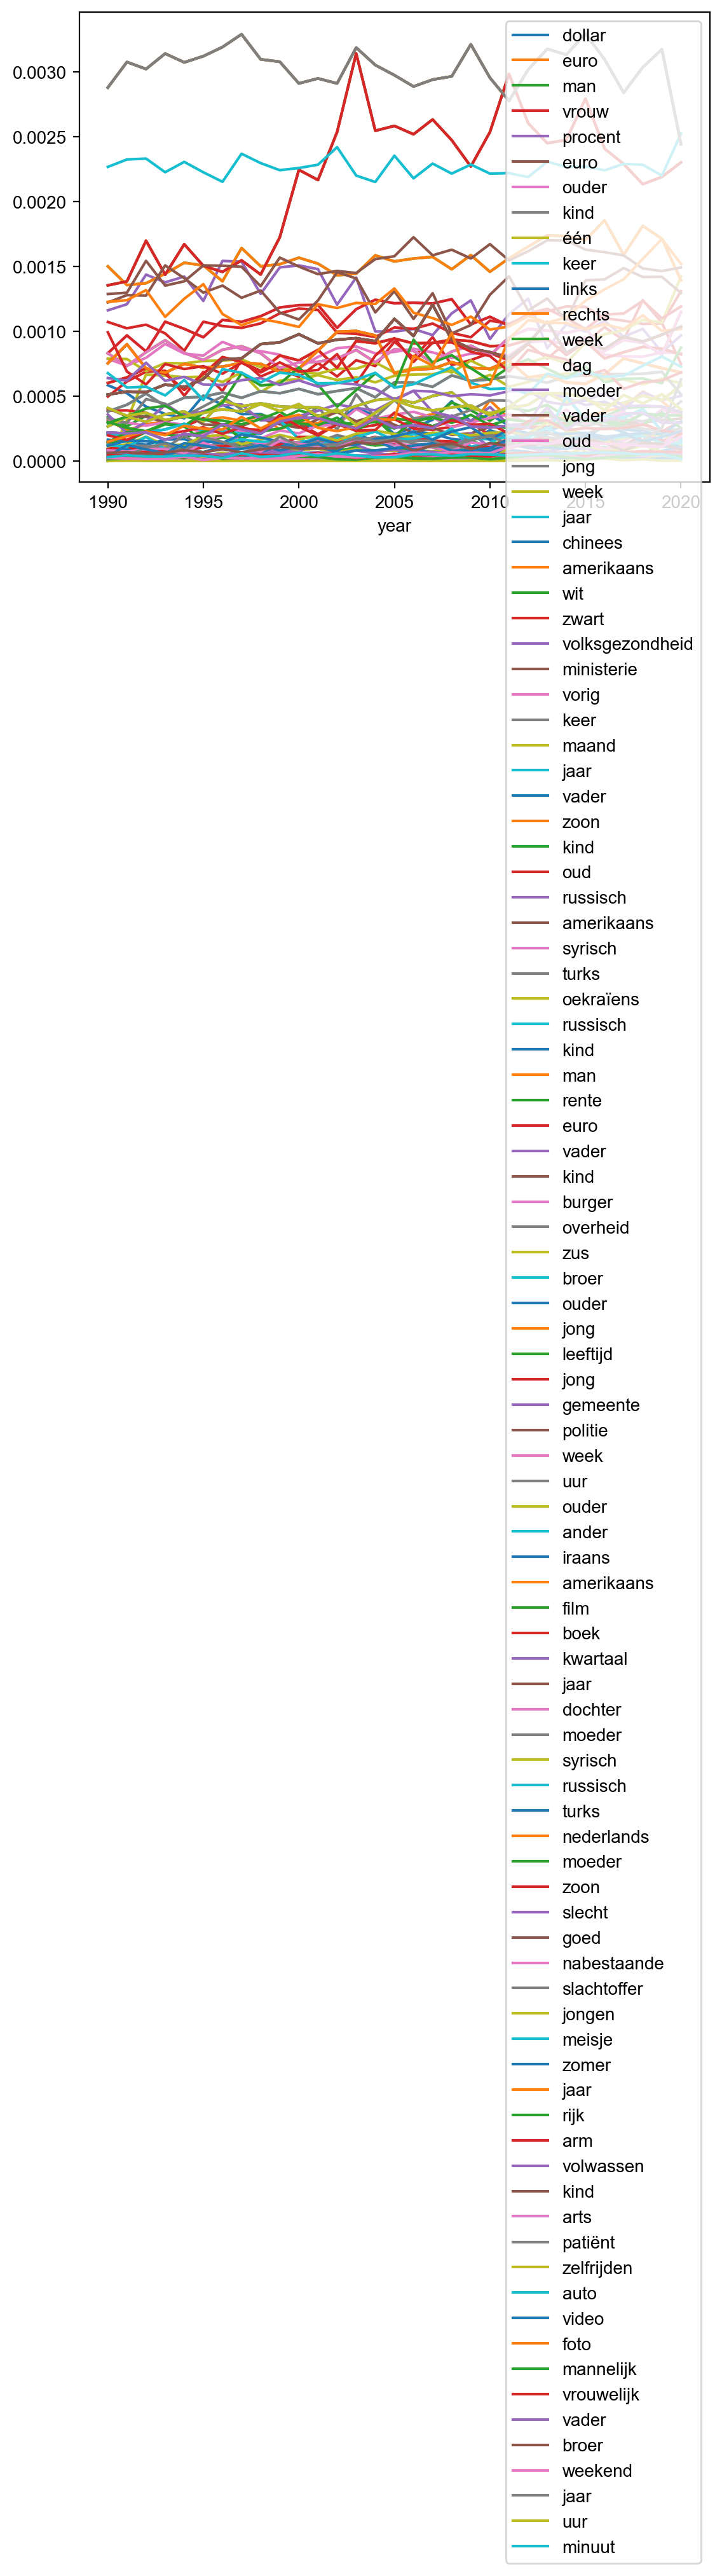

In [306]:
import re
def count_word_occurrences(text, word):
    pattern = re.compile(r'\b' + re.escape(word), re.IGNORECASE)
    matches = pattern.findall(text)
    count = len(matches)
    return count


for w1_w2 in top_10_increase.col:
    w1, w2 = w1_w2.split('_')

    sample['c1'] = sample.text.apply(lambda x: count_word_occurrences(x,w1))
    sample['c2'] = sample.text.apply(lambda x: count_word_occurrences(x,w2))

    sum_by_year = sample.groupby('year').sum()

    (sum_by_year['c2'] / sum_by_year['lengte']).plot(label=w2)
    (sum_by_year['c1'] / sum_by_year['lengte']).plot(label=w1)

    sum_by_year['pair'] = all_arrays[all_pairs.index(w1_w2)]
    plt.legend()

    grangers = grangers_causation_matrix(sum_by_year, variables=['c1', 'c2', 'pair'])

    rel = ''
    if grangers[grangers.index == 'pair_y']['c1_x'].values[0] < 0.05:
        rel += '_c1>w'
    if grangers[grangers.index == 'pair_y']['c2_x'].values[0] < 0.05:
        rel += '_c2>w'
    if grangers[grangers.index == 'c2_y']['pair_x'].values[0] < 0.05:
        rel += '_w>c2'
    if grangers[grangers.index == 'c1_y']['pair_x'].values[0] < 0.05:
        rel += '_w>c1'
        
    print(w1_w2, rel)

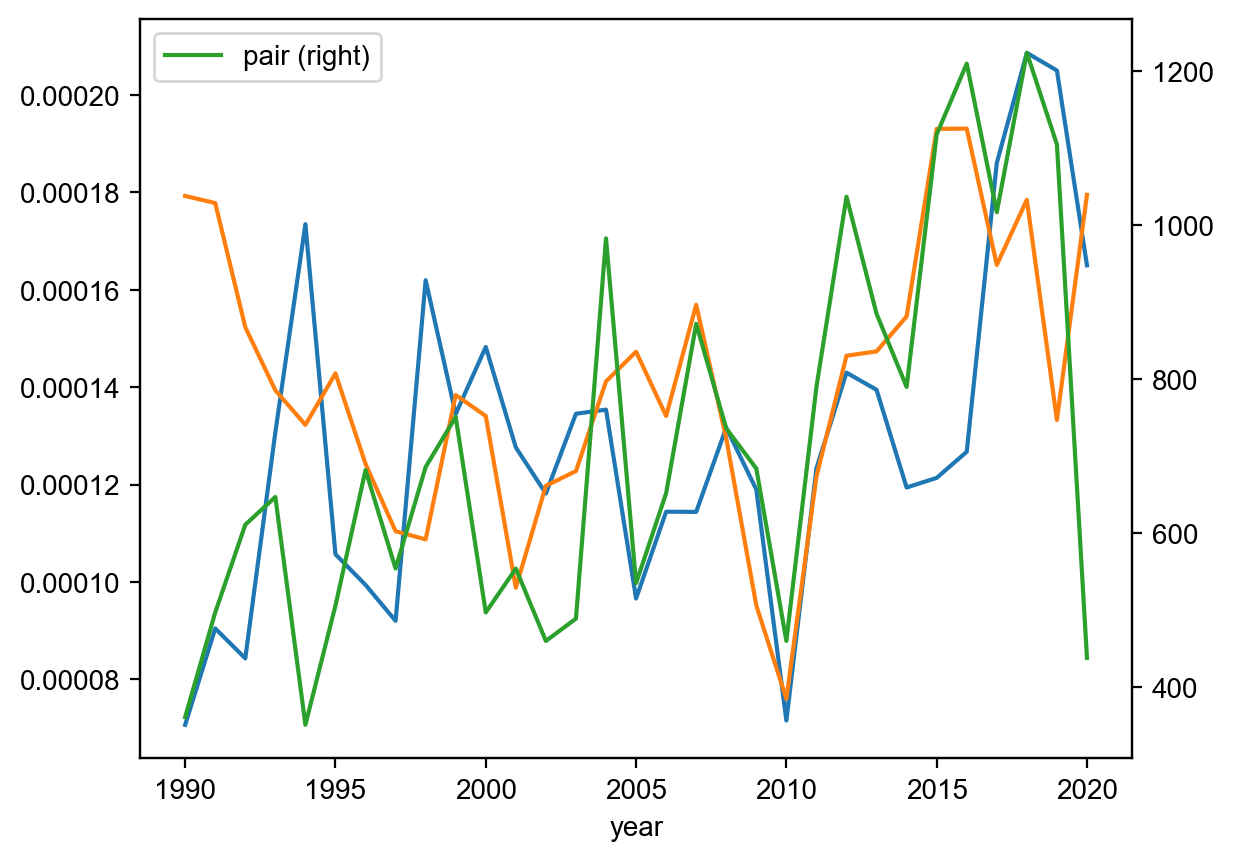

In [305]:
import re
w1 = 'zwarte'
w2 = 'witte'

def count_word_occurrences(text, word):
    pattern = re.compile(r'\b' + re.escape(word) + r'\b', re.IGNORECASE)
    matches = pattern.findall(text)
    count = len(matches)
    return count

sample['c1'] = sample.text.apply(lambda x: count_word_occurrences(x,w1))
sample['c2'] = sample.text.apply(lambda x: count_word_occurrences(x,w2))

sum_by_year = sample.groupby('year').sum()

(sum_by_year['c2'] / sum_by_year['lengte']).plot(label=w2)
(sum_by_year['c1'] / sum_by_year['lengte']).plot(label=w1)

sum_by_year['pair'] = all_arrays[all_pairs.index('vrouw_man')]

sum_by_year.pair.plot(secondary_y=True)
plt.legend()